## Building a neural netwrok

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [10]:
# Converts the PIL Image or NumPy ndarray to FloatTensor 
transform = transforms.ToTensor()

#Load the MNIST data
train = MNIST(root='./data', train=True, download=True, transform=transform)
test = MNIST(root='./data', train=False, download=True, transform=transform)

# Combine the test data and trainings data to obtain the complete dataset
images = np.concatenate([train.data.numpy(), test.data.numpy()], axis=0)
labels = np.concatenate([train.targets.numpy(), test.targets.numpy()], axis=0)

# flatten images so that image is only one row in the DataFrame and add a column for the label
falttend_image = images.reshape((images.shape[0], -1))
data_with_labels = np.column_stack((labels, falttend_image))

# create column name
column_names = ['label'] + [f'pixel{i}' for i in range(1, 785)]

# create DataFrame
df_mnist = pd.DataFrame(data_with_labels, columns=column_names)

print(df_mnist.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      5       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      4       0       0       0       0       0       0       0       0   
3      1       0       0       0       0       0       0       0       0   
4      9       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

In [11]:
# Load data and shuffle
data = np.array(df_mnist)
m, n = data.shape
np.random.shuffle(data)

# Split data into development and training sets, and thn transpose for easier column-wise acces
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [12]:
# Initialize parameters randomly for two-layer neurol network
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Rectified Linear Unit (ReLU) activation function
def ReLU(Z):
    return np.maximum(0, Z)

# Softmax function for output layer
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

# forward propagation to compute predictions
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Convert labels to one-hot vectors
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Derivative of ReLU function
def deriv_ReLU(Z):
    return Z > 0

# Backward prpagation to compute gradients
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, 1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters using gradients
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2 
    return W1, b1, W2, b2

In [13]:
# Predict class labels for samples in X
def get_predictions(A2):
    return np.argmax(A2, 0)

# Calculate the accuracy of predicitons
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Perform gradient descent to learn model parameters
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print('Iteration: ', i)
            print('Accuracy: ', get_accuracy(get_predictions(A2), Y))
        return W1, b1, W2, b2

In [14]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[1 1 1 ... 1 1 1] [7 4 6 ... 5 0 5]
Accuracy:  0.09185507246376812


/var/folders/ns/gnh3r6q105b8fk5btmkczgnh0000gn/T/ipykernel_17706/234867188.py:15: RuntimeWarning: overflow encountered in exp
  return np.exp(Z) / np.sum(np.exp(Z))
/Users/boraneker/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/ns/gnh3r6q105b8fk5btmkczgnh0000gn/T/ipykernel_17706/234867188.py:15: RuntimeWarning: invalid value encountered in divide
  return np.exp(Z) / np.sum(np.exp(Z))


In [16]:
# Function to make predicitons based on the model parameters and input featuers
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

# Functions to test predictions on a single example from the training set
def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    predictions = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print('Prediciton: ', predictions)
    print('Label: ', label)

# Display the image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediciton:  [0]
Label:  9


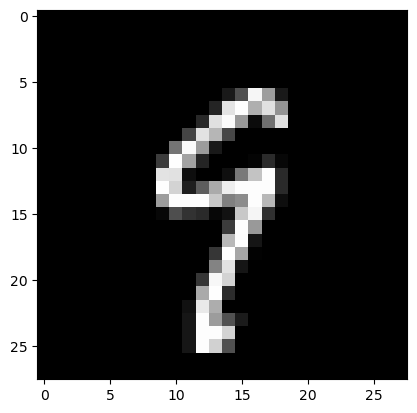

In [18]:
test_predictions(6, W1, b1, W2, b2)